<a href="https://colab.research.google.com/github/BVamshikrishna/Ml-Projects/blob/main/Birth_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
births = pd.read_csv("/content/drive/MyDrive/Ml Projects/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [ ]:
births['day'].fillna(0,inplace=True)
births['day'] = births['day'].astype(int)

In [ ]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15547 non-null  int64 
 1   month   15547 non-null  int64 
 2   day     15547 non-null  int64 
 3   gender  15547 non-null  object
 4   births  15547 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 607.4+ KB


In [ ]:
births['decade'] = 10*(births['year']//10)
births.pivot_table('births', index='decade', columns='gender', aggfunc=sum)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


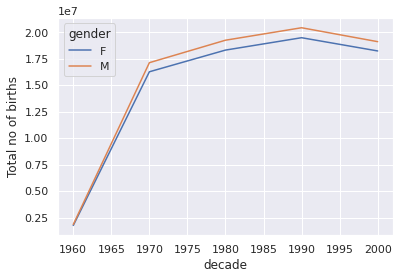

In [ ]:
sbn.set()
births_decade = births.pivot_table('births', index='decade',columns='gender',aggfunc=sum)
births_decade.plot()
plt.ylabel('Total no of births')
plt.show()



In [ ]:
quartiles = np.percentile(births['births'],[25,50,75])
mean = quartiles[1]
sigma = 0.74*(quartiles[2]-quartiles[0])

In [ ]:
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')
births['day of week'] = births.index.dayofweek

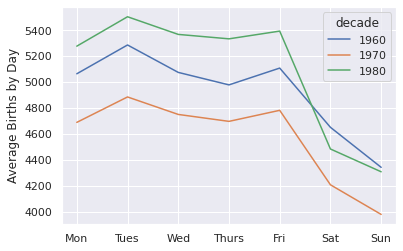

In [ ]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

In [ ]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


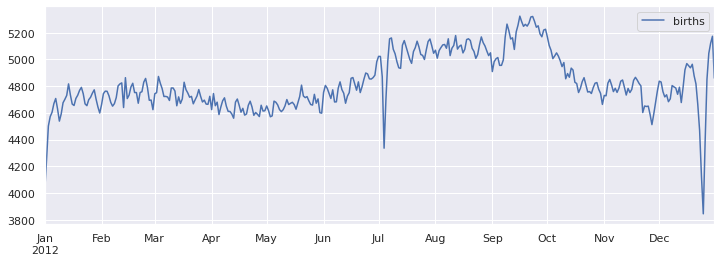

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()